## **Linear Regression **
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.



# Pankaj Dubey

### Imorting all the library

In [3]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import copy 
import pickle
import seaborn as sns
%matplotlib notebook

### Reading the data

In [4]:
# Reading data from remote link = "http://bit.ly/w-data"
data_path = 'http://bit.ly/w-data'
data = pd.read_csv(data_path)
print("Data imported successfully")

Data imported successfully


### Let's get to know about our data

In [5]:
# Let's us see first 5 row of our data
data.head() 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
# Shape of our data
data.shape

(25, 2)

In [7]:
# mean, median, and mode of our data
data.describe(include = 'all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
# Basics information about our data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


**Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.**

<IPython.core.display.Javascript object>


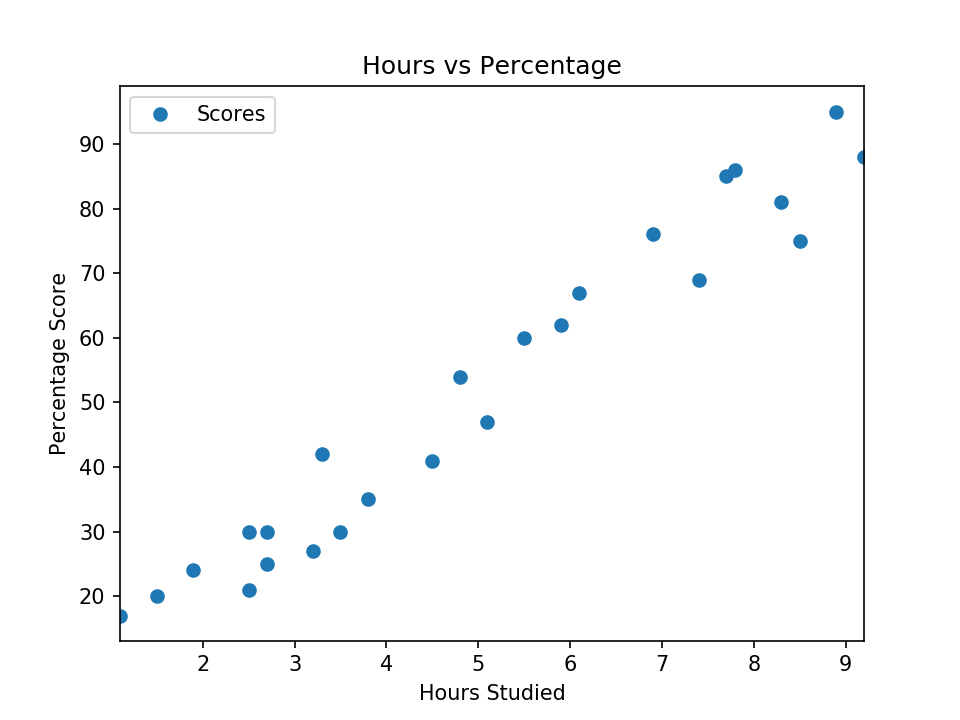

In [9]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [11]:
corr_matrix = data.corr()
corr_matrix

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<IPython.core.display.Javascript object>


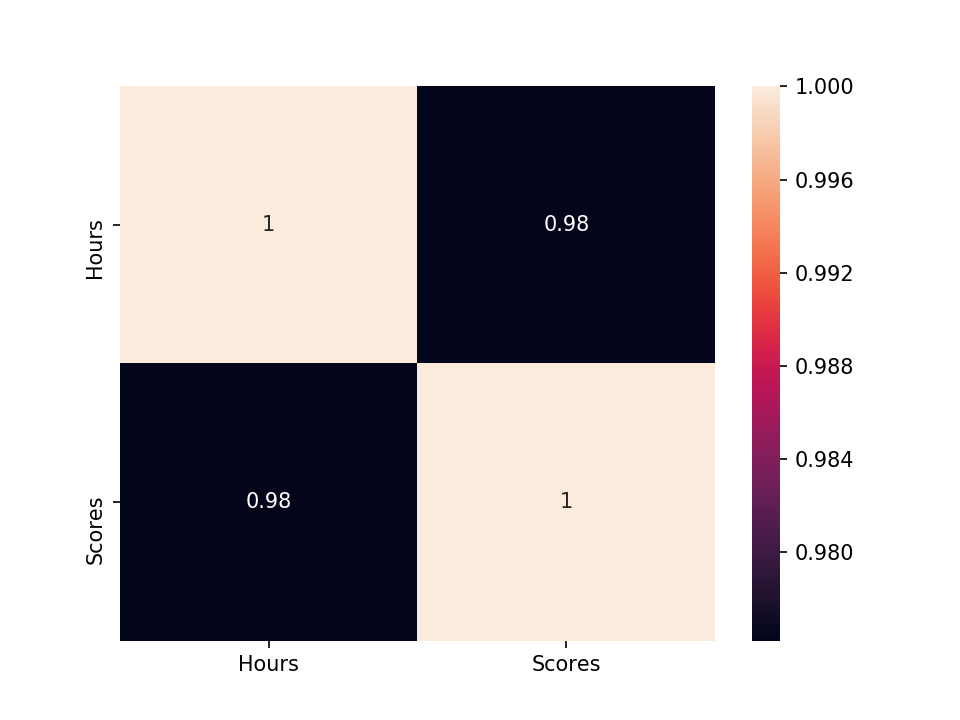

In [12]:
plt.figure()
sns.heatmap(corr_matrix,annot = True)
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [13]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [14]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0,) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

**Linear Regression**

In [15]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


<IPython.core.display.Javascript object>


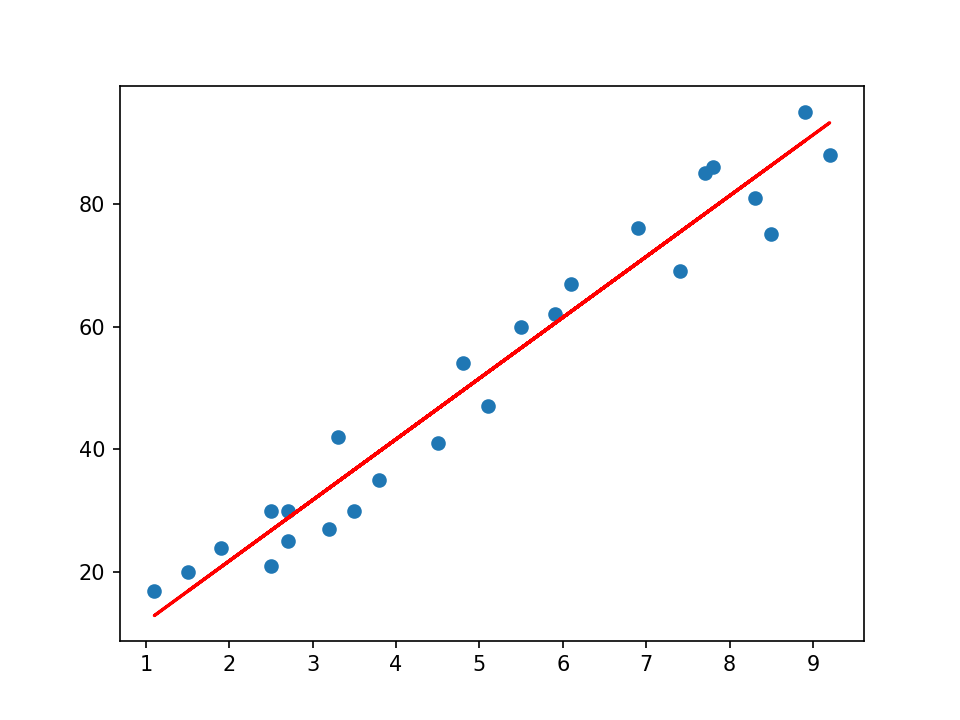

In [16]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.figure()
plt.scatter(X, y)
plt.plot(X, line,color = 'red');
plt.show()

**Decision Tree Regressor**

In [17]:
from sklearn.tree import DecisionTreeRegressor
Decision_regressor = DecisionTreeRegressor()  
Decision_regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


<IPython.core.display.Javascript object>


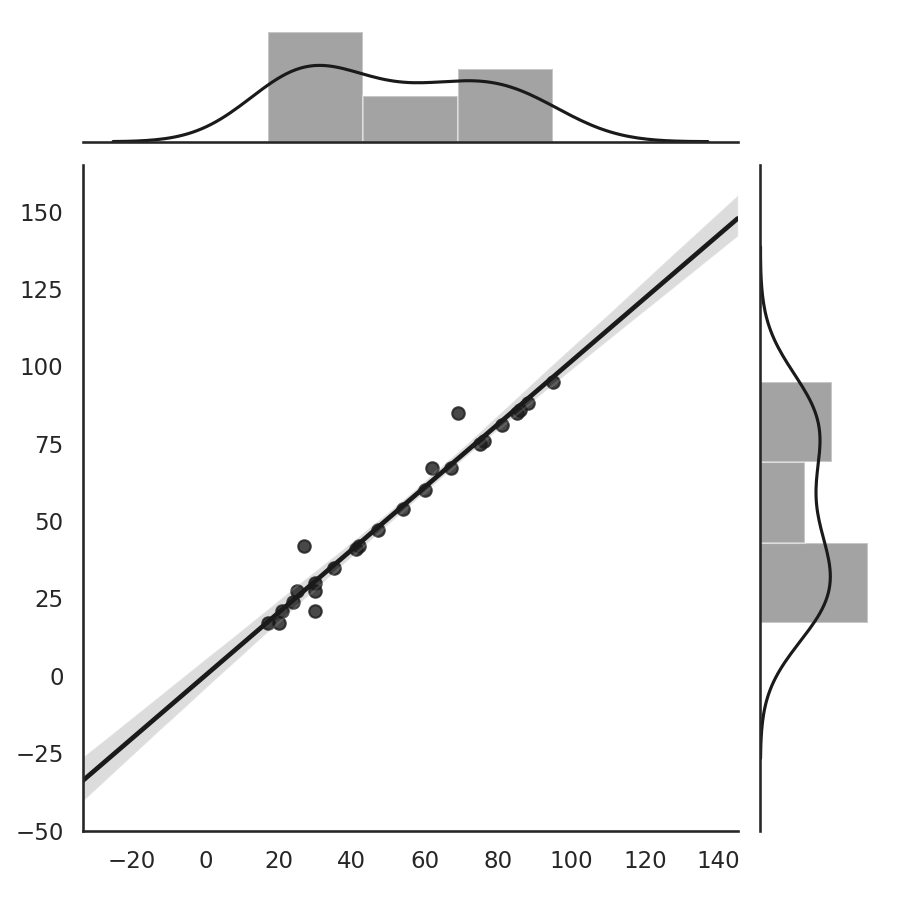

In [18]:
# Plotting the regression line
line = Decision_regressor.predict(X)
# Plotting for the test data
sns.set(style = 'darkgrid', color_codes = True)
with sns.axes_style('white'):
    sns.jointplot(x = y, y = line, kind = 'reg', color = 'k')
plt.show()

### **Making Predictions**
**Now that we have trained our algorithm, it's time to make some predictions.**

In [19]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [20]:
print(X_test) # Testing data - In Hours
y_pred1 = Decision_regressor.predict(X_test) # Predicting the scores
y_pred1

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([17., 42., 85., 21., 67.])

In [21]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [22]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})  
df

,Actual,Predicted
0,20,17.0
1,27,42.0
2,69,85.0
3,30,21.0
4,62,67.0


In [23]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [24]:
# You can also test with your own data
hours = 9.25
own_pred = Decision_regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 88.0


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [25]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [26]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred1)) 

Mean Absolute Error: 9.6


## **As we can see in above example the Linear Regression works better than Decision Tree Regressor**

In [27]:
#copy_model = copy.deepcopy(agent.model)

with open('model.pkl', 'wb') as fopen:
    pickle.dump(regressor, fopen)

In [31]:
model = pickle.load(open('model.pkl','rb'))